In [10]:
import pandas as pd
import json
# Detect which county is in the county_to_fips data and not in the ncei data

In [29]:
# Data from the ncei site
ncei = pd.read_csv("./ncei_county_data.csv")

# Modify countyId to make the datatype and format match the gist data
ncei["countyId"] = ncei["countyId"].apply(lambda x: f"{x:00005}")
ncei["stateId"] = ncei["stateId"].apply(lambda x: f"{x:02}")
ncei

,Unnamed: 0,name,stateId,state,stateAbbr,value,rank,anomaly,mean,countyId
0,0,Autauga County,01,Alabama,AL,55.2,75,0.9,54.3,01001
1,1,Baldwin County,01,Alabama,AL,59.3,79,1.0,58.3,01003
2,2,Barbour County,01,Alabama,AL,55.3,64,-0.5,55.8,01005
3,3,Bibb County,01,Alabama,AL,54.3,82,1.5,52.8,01007
4,4,Blount County,01,Alabama,AL,54.2,108,3.6,50.6,01009
...,...,...,...,...,...,...,...,...,...,...
3102,3102,Sweetwater County,48,Wyoming,WY,32.4,105,3.9,28.5,56037
3103,3103,Teton County,48,Wyoming,WY,27.6,107,4.1,23.5,56039
3104,3104,Uinta County,48,Wyoming,WY,31.5,100,3.4,28.1,56041
3105,3105,Washakie County,48,Wyoming,WY,36.1,116,5.3,30.8,56043


In [42]:
# Opening JSON file
f = open("./gist_geojson.json")
 
# returns JSON object as 
# a dictionary
gist_data = json.load(f)['features']
geoid = []
name = []
stateFP = []

for i in gist_data:
    geoid.append(i['properties']['GEOID'])
    name.append(i['properties']['NAME'])
    stateFP.append(i['properties']['STATEFP'])

In [43]:
gist_data

[{'type': 'Feature',
  'properties': {'STATEFP': '06',
   'COUNTYFP': '075',
   'COUNTYNS': '00277302',
   'AFFGEOID': '0500000US06075',
   'GEOID': '06075',
   'NAME': 'San Francisco',
   'LSAD': '06',
   'ALAND': 121485107,
   'AWATER': 479107241},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-122.511983, 37.771129999086256],
     [-122.465396, 37.800878999086],
     [-122.398139, 37.80562999908597],
     [-122.385323, 37.79072399908609],
     [-122.376462, 37.73855799908652],
     [-122.356784, 37.72950499908658],
     [-122.361749, 37.71500999908672],
     [-122.389826876588, 37.70833099908677],
     [-122.50067801908301, 37.70813256710466],
     [-122.50560125134501, 37.73556746432725],
     [-122.511983, 37.771129999086256]]]}},
 {'type': 'Feature',
  'properties': {'STATEFP': '25',
   'COUNTYFP': '025',
   'COUNTYNS': '00606939',
   'AFFGEOID': '0500000US25025',
   'GEOID': '25025',
   'NAME': 'Suffolk',
   'LSAD': '06',
   'ALAND': 150855462,
   'AWATER': 160479920},


In [17]:
# Create new dataframe for easier comparison
gist_dict = {"GEOID": geoid, "NAME": name, "STATEFP": stateFP}
gist_df = pd.DataFrame(gist_dict)

In [18]:
gist_df.head()

,GEOID,NAME,STATEFP
0,06075,San Francisco,06
1,25025,Suffolk,25
2,31007,Banner,31
3,37181,Vance,37
4,48421,Sherman,48


In [26]:
missing_counties = {}

# ncei["isin"] = ncei["countyId"].isin(gist_df['GEOID'])
# print(county_to_fips.values())
gist_df['isin'] = gist_df['GEOID'].isin(ncei["countyId"])

In [27]:
# These are the counties that are missing in ncei compared to gist_df
gist_df[gist_df['isin'] == False]

,GEOID,NAME,STATEFP,isin
20,72101,Morovis,72,False
51,72109,Patillas,72,False
53,72087,Loíza,72,False
78,72095,Maunabo,72,False
79,72031,Carolina,72,False
...,...,...,...,...
3150,02282,Yakutat,02,False
3166,72063,Gurabo,72,False
3211,72137,Toa Baja,72,False
3212,72039,Ciales,72,False


<Axes: xlabel='STATEFP'>

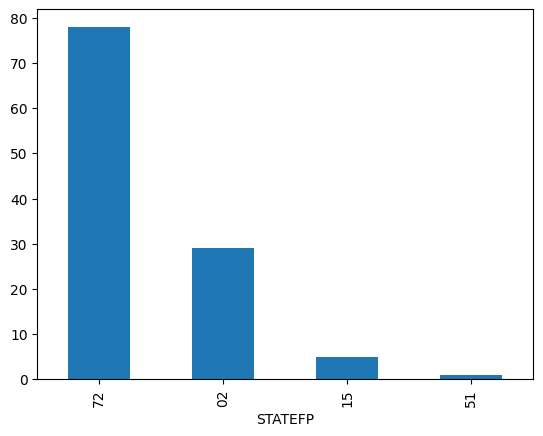

In [40]:
import matplotlib.pyplot as plt

gist_missing_df = gist_df[gist_df['isin'] == False]
# gist_df[gist_df['isin'] == False][['STATEFP', 'GEOID', 'NAME']].hist()
fig, ax = plt.subplots()
gist_missing_df['STATEFP'].value_counts().plot(ax=ax, kind='bar')

In [46]:
gist_missing_df['GEOID'].unique()

array(['72101', '72109', '72087', '72095', '72031', '72053', '72071',
       '72131', '72151', '72067', '72129', '72127', '72153', '72009',
       '72054', '72007', '72061', '72041', '72147', '72099', '51678',
       '72017', '72145', '72139', '72079', '72069', '72105', '72113',
       '72025', '72125', '02164', '72033', '72059', '02068', '15005',
       '72091', '72075', '02013', '02290', '02180', '72047', '02188',
       '72111', '72011', '02090', '02070', '02240', '72121', '72083',
       '02130', '02110', '02158', '72003', '72023', '02016', '02050',
       '02100', '02020', '02122', '02150', '02261', '02060', '15003',
       '72135', '72149', '72133', '72143', '02220', '15007', '72103',
       '72005', '72019', '72107', '72035', '72123', '72029', '72037',
       '72043', '72051', '72093', '72115', '72117', '72085', '02198',
       '72049', '02195', '72015', '15001', '72081', '72057', '72013',
       '02105', '72141', '02185', '02170', '72027', '72097', '72119',
       '02275', '720

In [44]:
gist_missing_df[gist_missing_df["STATEFP"] == "02"]

,GEOID,NAME,STATEFP,isin
896,02164,Lake and Peninsula,02,False
984,02068,Denali,02,False
1126,02013,Aleutians East,02,False
1127,02290,Yukon-Koyukuk,02,False
1129,02180,Nome,02,False
1182,02188,Northwest Arctic,02,False
1356,02090,Fairbanks North Star,02,False
1357,02070,Dillingham,02,False
1437,02240,Southeast Fairbanks,02,False
1588,02130,Ketchikan Gateway,02,False
